# Task 1: Univariate and Bivariate analysis

In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/content/drive/My Drive/innomatics_data/dataset.csv')

# Display first few rows
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [9]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

## Data Cleaning

In [10]:
# Rename of column
df = df.rename(columns={'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility': 'CAFV_Eligibility'})
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [12]:
# checking unique values of each column
for column in df.columns:
    print("--"*20, column, "--"*30)
    print(df[column].unique())

---------------------------------------- VIN_(1-10) ------------------------------------------------------------
['JTMEB3FV6N' '1G1RD6E45D' 'JN1AZ0CP8B' ... 'KMHE14L25K' 'WA1LAAGE5M'
 'YV4ED3GM0P']
---------------------------------------- County ------------------------------------------------------------
['Monroe' 'Clark' 'Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston'
 'Grant' 'St. Clair' 'Pierce' 'Saratoga' 'Stevens' 'King' 'Kitsap'
 'Newport News' 'Jackson' 'Whitman' 'Lake' 'Spokane' 'Clallam' 'Cowlitz'
 'Kittitas' 'Grays Harbor' 'Chelan' 'Whatcom' 'Benton' 'Walla Walla'
 'Mason' 'San Juan' 'Lewis' 'Jefferson' 'Douglas' 'Klickitat' 'Geary'
 'Skamania' 'Fairfax' 'Adams' 'Franklin' 'Okanogan' 'Sonoma' 'Asotin'
 'Ferry' 'Pacific' 'Riverside' 'Orange' 'Columbia' 'Wahkiakum'
 'Leavenworth' 'Contra Costa' 'Howard' 'Larimer' 'District of Columbia'
 'Washington' 'Tipton' 'San Diego' 'Sumter' "Prince George's" 'New Haven'
 'Lincoln' 'Las Animas' 'Frederick' 'Hidalgo' 'Pend Oreille' 'Bexar

In [13]:
# checking null values
df.isnull().sum()

,0
VIN_(1-10),0
County,0
City,0
State,0
Postal_Code,0
Model_Year,0
Make,0
Model,20
Electric_Vehicle_Type,0
CAFV_Eligibility,0


In [14]:
df.isnull().sum().sort_values(ascending=False)

,0
Electric_Utility,443
Legislative_District,286
Vehicle_Location,24
Model,20
VIN_(1-10),0
Postal_Code,0
County,0
State,0
City,0
Electric_Vehicle_Type,0


In [15]:
# removal of null values
df.dropna(inplace = True)
df.isnull().sum()

,0
VIN_(1-10),0
County,0
City,0
State,0
Postal_Code,0
Model_Year,0
Make,0
Model,0
Electric_Vehicle_Type,0
CAFV_Eligibility,0


In [16]:
# checking duplicate records
df.duplicated().sum()

0

In [17]:
# Separate the numerical and discrete columns

numerical_df = df.select_dtypes(include=['int64', 'float64'])
discrete_df = df.select_dtypes(include=['object'])

In [18]:
numerical_df.columns

Index(['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', 'DOL_Vehicle_ID', '2020_Census_Tract'],
      dtype='object')

In [19]:
discrete_df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

# UA(Non visual)

In [21]:
def discrete_univariant_analysis(discrete_data):
  for col_name in discrete_data:
    print("--"*20, col_name, "--"*20)
    print(df[col_name].agg(['count', 'unique', 'nunique']))
    print("Value Counts\n", df[col_name].value_counts())
    print()
discrete_univariant_analysis(discrete_df)

---------------------------------------- VIN_(1-10) ----------------------------------------
count                                                 112152
unique     [JN1AZ0CP8B, 1G1FW6S08H, 3FA6P0SU1K, 5YJ3E1EB5...
nunique                                                 7522
Name: VIN_(1-10), dtype: object
Value Counts
 VIN_(1-10)
5YJYGDEE9M    471
5YJYGDEE0M    463
5YJYGDEE7M    447
5YJYGDEE8M    446
5YJYGDEE2M    435
             ... 
WBA5P9C03M      1
YV4BR0CMXL      1
WA12AAGE0N      1
1G1RD6S58K      1
WA132BFZ9N      1
Name: count, Length: 7522, dtype: int64

---------------------------------------- County ----------------------------------------
count                                                 112152
unique     [Yakima, Skagit, Snohomish, Island, Thurston, ...
nunique                                                   39
Name: County, dtype: object
Value Counts
 County
King            58980
Snohomish       12412
Pierce           8525
Clark            6681
Thurston         41

In [22]:
def numerical_univariant_analysis(numerical_data):
    for col_name in numerical_data:
        print("--"*20, col_name, "--"*20)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()
numerical_univariant_analysis(numerical_df)

---------------------------------------- Postal_Code ----------------------------------------
min       98001.000000
max       99403.000000
mean      98258.856659
median    98121.000000
std         302.889935
Name: Postal_Code, dtype: float64

---------------------------------------- Model_Year ----------------------------------------
min       1997.000000
max       2023.000000
mean      2019.004494
median    2020.000000
std          2.891859
Name: Model_Year, dtype: float64

---------------------------------------- Electric_Range ----------------------------------------
min         0.000000
max       337.000000
mean       87.829651
median     32.000000
std       102.336645
Name: Electric_Range, dtype: float64

---------------------------------------- Base_MSRP ----------------------------------------
min            0.000000
max       845000.000000
mean        1793.882320
median         0.000000
std        10785.259118
Name: Base_MSRP, dtype: float64

----------------------------------

# UV (Visual Analysis)

In [23]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

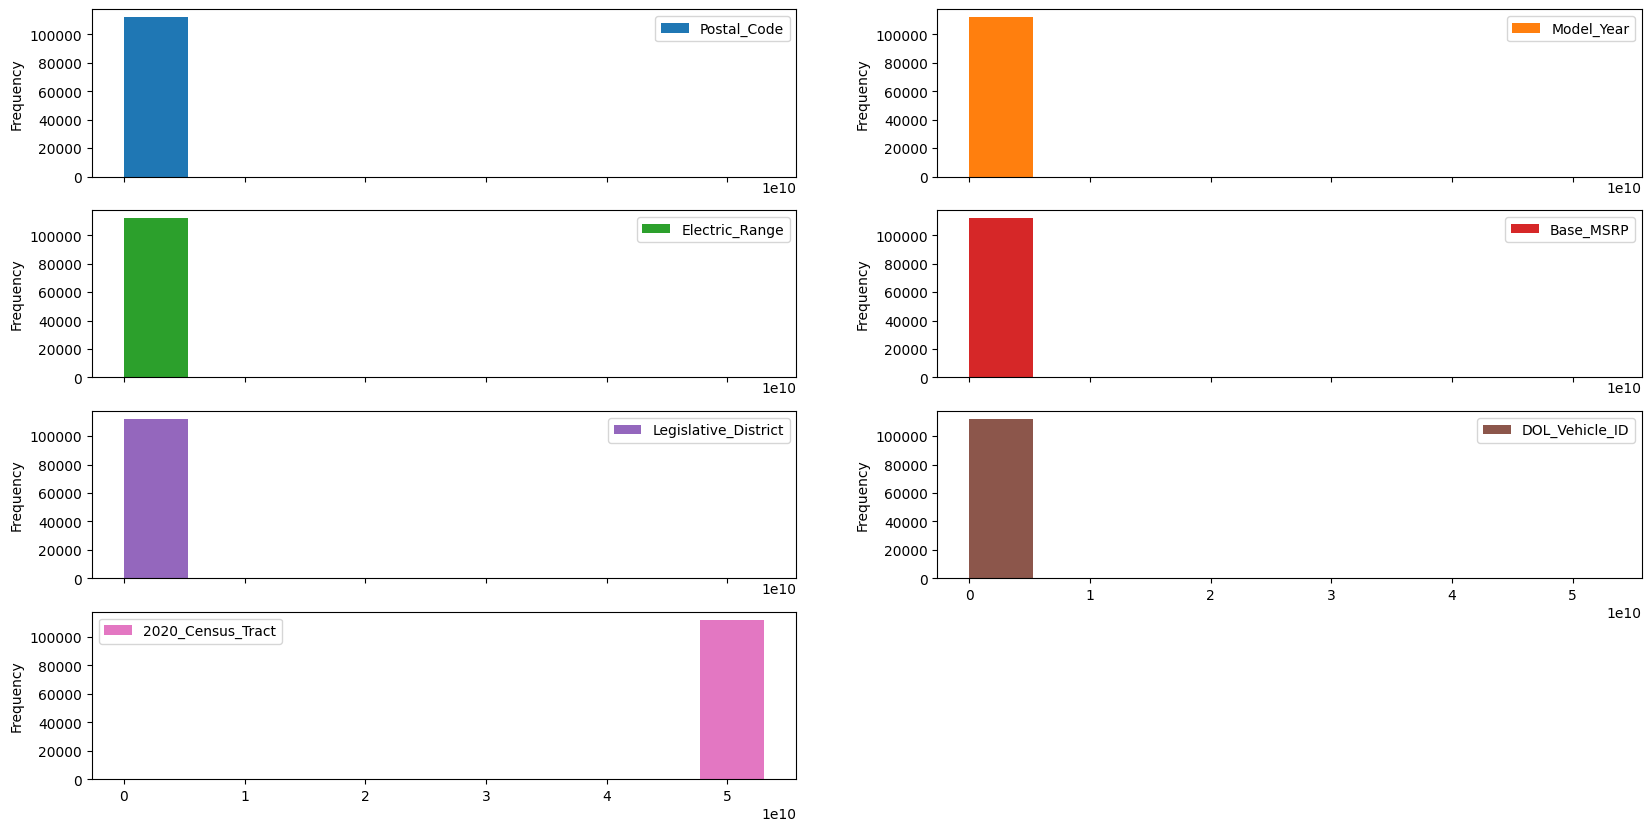

In [24]:
df.plot(kind='hist', subplots=True, layout=(4,2), figsize=(20,10))
plt.show()

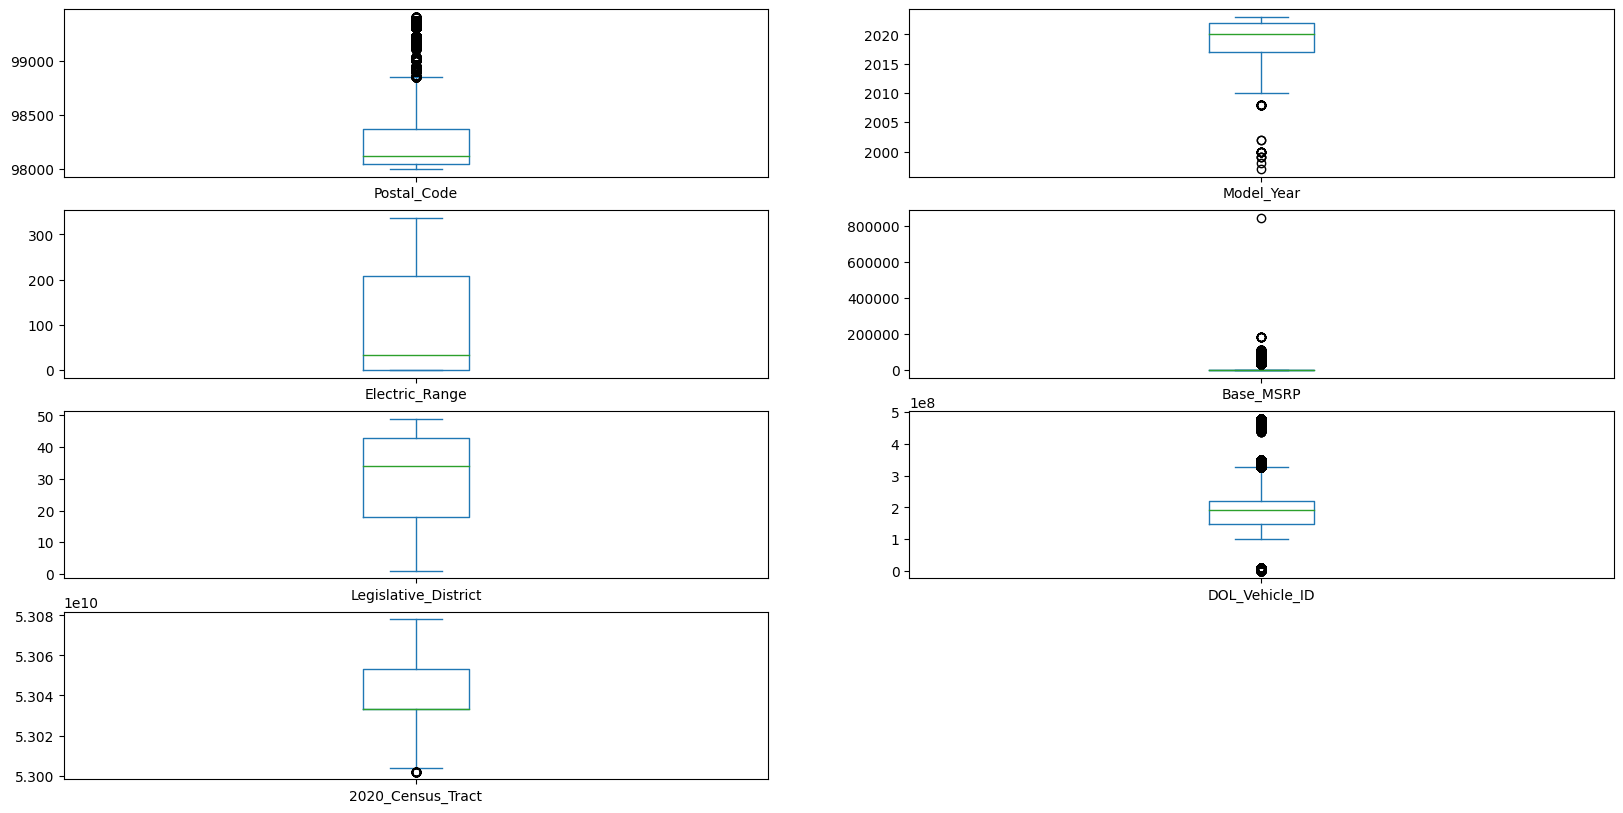

In [25]:
df.plot(kind='box', subplots=True, layout=(4,2), figsize=(20,10))
plt.show()

# Bivariant Analysis

In [35]:
numerical_df.corr()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
Postal_Code,1.000000,-0.054799,-0.030914,-0.009447,-0.432551,-0.004615,0.020639
Model_Year,-0.054799,1.000000,-0.288952,-0.229369,0.010423,-0.068401,-0.030528
Electric_Range,-0.030914,-0.288952,1.000000,0.085310,0.024383,0.009579,-0.015352
Base_MSRP,-0.009447,-0.229369,0.085310,1.000000,0.012474,0.000461,-0.002684
Legislative_District,-0.432551,0.010423,0.024383,0.012474,1.000000,-0.001642,-0.111296
DOL_Vehicle_ID,-0.004615,-0.068401,0.009579,0.000461,-0.001642,1.000000,-0.000547
2020_Census_Tract,0.020639,-0.030528,-0.015352,-0.002684,-0.111296,-0.000547,1.000000


### ***Continuous vs Continuous***

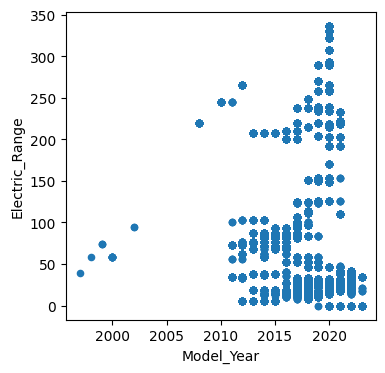

In [36]:
df.plot(kind='scatter', x='Model_Year', y='Electric_Range', figsize=(4, 4))
plt.show()

In [37]:

df2 = df.loc[df['Base_MSRP'] < 80000]

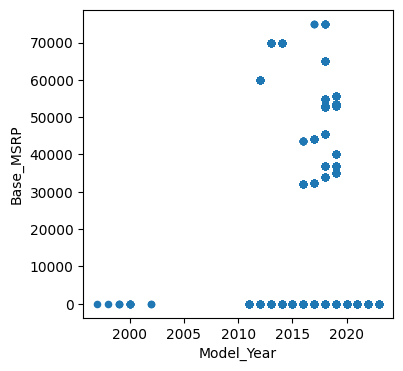

In [38]:
df2.plot(kind='scatter', x='Model_Year', y='Base_MSRP', figsize=(4, 4))
plt.show()

## Discrete vs Discrete

In [39]:
pd.crosstab(df['Model_Year'], df['CAFV_Eligibility'], normalize = True)

CAFV_Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Model_Year,,,
1997,0.000009,0.000000,0.000000
1998,0.000009,0.000000,0.000000
1999,0.000027,0.000000,0.000000
2000,0.000089,0.000000,0.000000
2002,0.000018,0.000000,0.000000
2008,0.000205,0.000000,0.000000
2010,0.000214,0.000000,0.000000
2011,0.007445,0.000000,0.000000
2012,0.011796,0.000000,0.003317


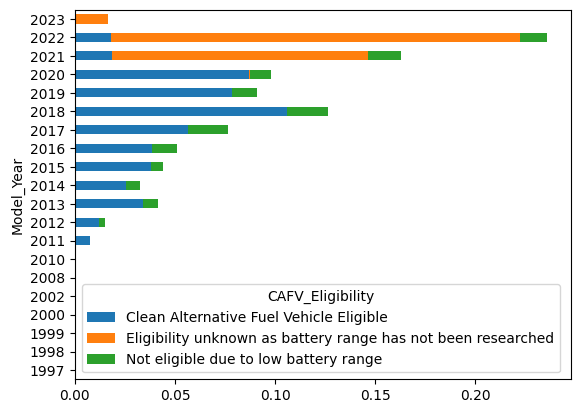

In [40]:
tab = pd.crosstab(df['Model_Year'], df['CAFV_Eligibility'], normalize = True)
tab.plot(kind='barh', stacked=True)
plt.show()

In [41]:
pd.crosstab(df['Model_Year'],df['Electric_Vehicle_Type'])

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model_Year,,
1997,1,0
1998,1,0
1999,3,0
2000,10,0
2002,2,0
2008,23,0
2010,24,0
2011,765,70
2012,810,885


<Axes: ylabel='Model_Year'>

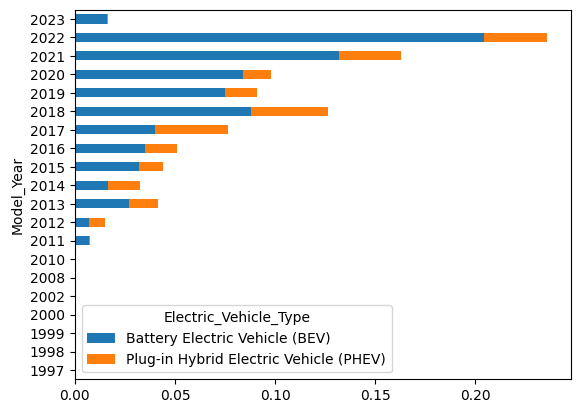

In [42]:
tab = pd.crosstab(df['Model_Year'], df['Electric_Vehicle_Type'], normalize = True)
tab.plot(kind='barh', stacked=True)

## Discrete vs Continuous

In [43]:
group = df.groupby('Model')
group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Model,,,,
330E,2016,2022,2018.979933,2018.0
500,2013,2019,2015.445122,2015.0
530E,2018,2022,2018.727554,2018.0
740E,2017,2019,2017.896552,2018.0
745E,2020,2020,2020.000000,2020.0
...,...,...,...,...
X3,2020,2021,2020.726027,2021.0
X5,2016,2022,2019.922254,2021.0
XC40,2021,2023,2021.507071,2022.0


In [44]:
group = df.groupby('Electric_Vehicle_Type')
group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Electric_Vehicle_Type,,,,
Battery Electric Vehicle (BEV),1997,2023,2019.350044,2020.0
Plug-in Hybrid Electric Vehicle (PHEV),2011,2023,2017.883195,2018.0


In [45]:
group = df.groupby('CAFV_Eligibility')
group['Model_Year'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
CAFV_Eligibility,,,,
Clean Alternative Fuel Vehicle Eligible,1997,2023,2017.486925,2018.0
Eligibility unknown as battery range has not been researched,2019,2023,2021.677162,2022.0
Not eligible due to low battery range,2012,2023,2017.921623,2018.0


<Axes: title={'center': 'Model_Year'}, xlabel='Electric_Vehicle_Type'>

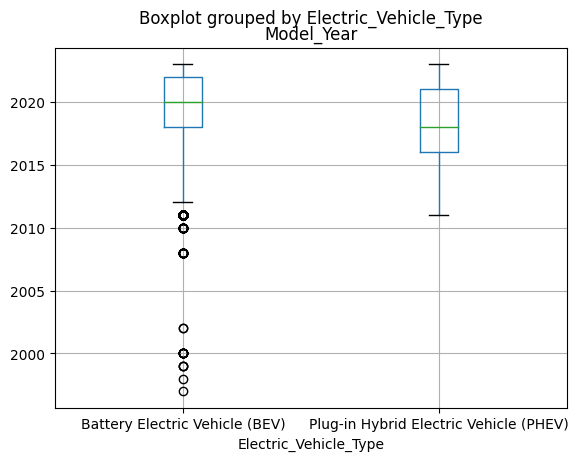

In [46]:
df.boxplot(by="Electric_Vehicle_Type",column=['Model_Year'])

<Axes: title={'center': 'Model_Year'}, xlabel='CAFV_Eligibility'>

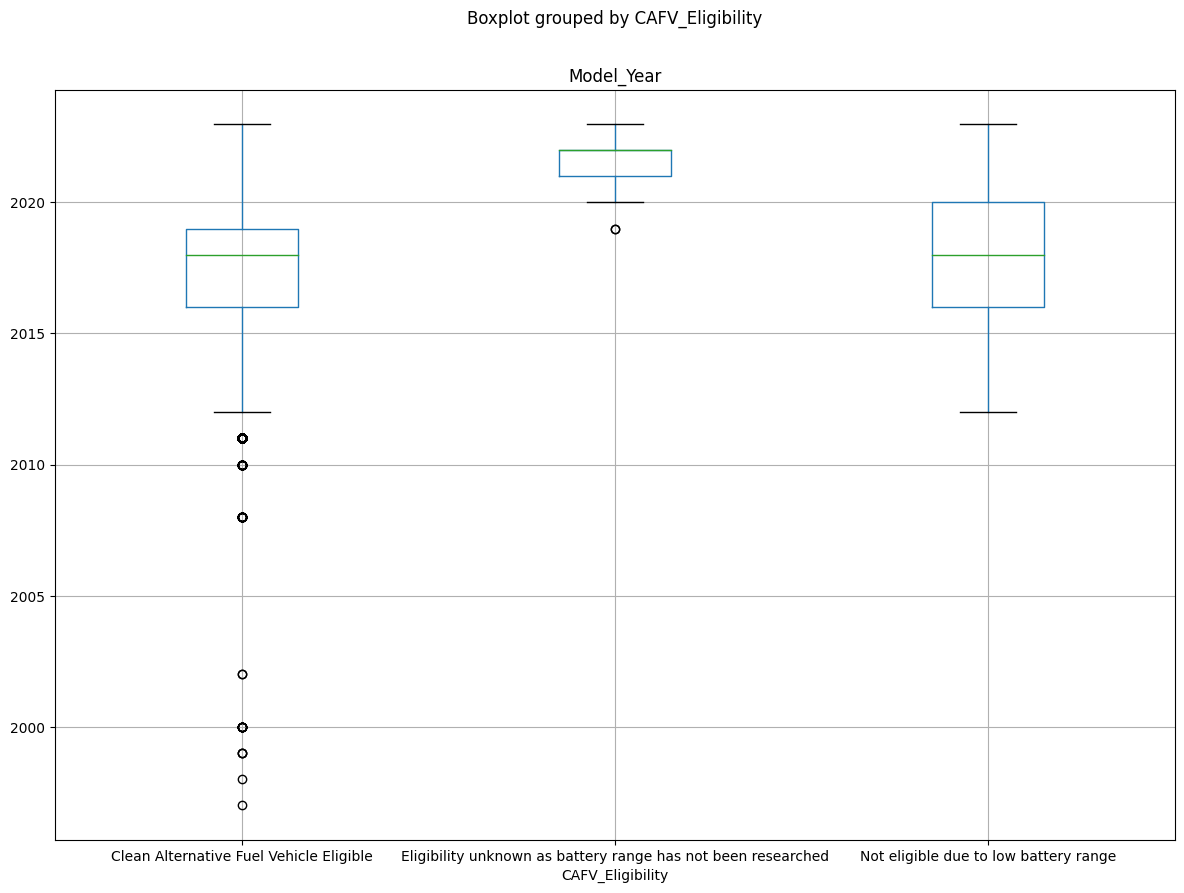

In [47]:
df.boxplot(by="CAFV_Eligibility",column=['Model_Year'], figsize=(14, 10))

# Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [48]:
# import libraries
import json
import pandas as pd
import plotly.express as px

In [50]:
#Load GeoJSON file
geojson_file_path = '/content/wa_washington_zip_codes_geo.min.json'  # Replace with your file path or URL
with open(geojson_file_path) as f:
    zipcodes = json.load(f)
zipcodes

Output hidden; open in https://colab.research.google.com to view.

In [51]:
# count of ev vehicles available in postalcode, modelyear,state
ev_pincode = df.groupby(["Postal_Code", 'Model_Year', 'State']).size().reset_index(name='Electric Vehicle Count')
ev_pincode

,Postal_Code,Model_Year,State,Electric Vehicle Count
0,98001,2011,WA,1
1,98001,2012,WA,5
2,98001,2013,WA,23
3,98001,2014,WA,23
4,98001,2015,WA,19
...,...,...,...,...
4731,99403,2019,WA,1
4732,99403,2020,WA,4
4733,99403,2021,WA,6
4734,99403,2022,WA,5


In [52]:
# etracting details of ev vehicles only in Washington
state_data_WA = ev_pincode[ev_pincode['State']=='WA']
state_data_WA

,Postal_Code,Model_Year,State,Electric Vehicle Count
0,98001,2011,WA,1
1,98001,2012,WA,5
2,98001,2013,WA,23
3,98001,2014,WA,23
4,98001,2015,WA,19
...,...,...,...,...
4731,99403,2019,WA,1
4732,99403,2020,WA,4
4733,99403,2021,WA,6
4734,99403,2022,WA,5


In [53]:
state_data_WA[state_data_WA['Postal_Code']==98052]['Electric Vehicle Count'].sum()

2914

In [54]:
# count of ev vehicles correspond to its pincodes
state_WA_df = state_data_WA.groupby('Postal_Code')['Electric Vehicle Count'].sum().reset_index()
state_WA_df

,Postal_Code,Electric Vehicle Count
0,98001,465
1,98002,165
2,98003,312
3,98004,2001
4,98005,829
...,...,...
511,99360,4
512,99361,8
513,99362,248
514,99402,9


In [55]:
# plot choropleth map using plotly express
fig = px.choropleth(state_WA_df,
                    geojson=zipcodes,
                    locations='Postal_Code',
                    color='Electric Vehicle Count',
                    featureidkey="properties.ZCTA5CE10",
                    scope="usa",
                    labels={'Postal_Code':'Zip Code'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [56]:
pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.5 MB/s eta 0:00:00


In [57]:
# import libraries
import bar_chart_race as bcr
import numpy as np
import pandas as pd

In [58]:
# removal of null values of dataframe
df = df.dropna()

df[df['Make'] == 'AUDI'].shape

(2320, 17)

In [61]:
# count of ev vehicles related to make, modelyear
year_ev_count = df.groupby(['Make', 'Model_Year']).size().reset_index(name="Electric Vehicle Count")
year_ev_count

,Make,Model_Year,Electric Vehicle Count
0,AUDI,2016,214
1,AUDI,2017,185
2,AUDI,2018,173
3,AUDI,2019,387
4,AUDI,2020,224
...,...,...,...
204,VOLVO,2019,190
205,VOLVO,2020,162
206,VOLVO,2021,576
207,VOLVO,2022,876


In [62]:
# understand maker brand of ev vehicles
year_ev_count['Make'].unique()

array(['AUDI', 'AZURE DYNAMICS', 'BENTLEY', 'BMW', 'CADILLAC',
       'CHEVROLET', 'CHRYSLER', 'FIAT', 'FISKER', 'FORD', 'GENESIS',
       'HONDA', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'LUCID MOTORS', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI',
       'NISSAN', 'POLESTAR', 'PORSCHE', 'RIVIAN', 'SMART', 'SUBARU',
       'TESLA', 'TH!NK', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [63]:
# total brand of ev vehicles available
len(year_ev_count['Make'].unique())

34

In [64]:
# understanding the each makers total records
for col_name in year_ev_count['Make'].unique():
    print("-"*20, col_name, "-"*20)
    print(f"{col_name}:{df[df['Make']==col_name].shape}")


-------------------- AUDI --------------------
AUDI:(2320, 17)
-------------------- AZURE DYNAMICS --------------------
AZURE DYNAMICS:(7, 17)
-------------------- BENTLEY --------------------
BENTLEY:(3, 17)
-------------------- BMW --------------------
BMW:(4660, 17)
-------------------- CADILLAC --------------------
CADILLAC:(108, 17)
-------------------- CHEVROLET --------------------
CHEVROLET:(10140, 17)
-------------------- CHRYSLER --------------------
CHRYSLER:(1780, 17)
-------------------- FIAT --------------------
FIAT:(820, 17)
-------------------- FISKER --------------------
FISKER:(19, 17)
-------------------- FORD --------------------
FORD:(5780, 17)
-------------------- GENESIS --------------------
GENESIS:(18, 17)
-------------------- HONDA --------------------
HONDA:(788, 17)
-------------------- HYUNDAI --------------------
HYUNDAI:(1407, 17)
-------------------- JAGUAR --------------------
JAGUAR:(218, 17)
-------------------- JEEP --------------------
JEEP:(1143, 

In [65]:

df_pivot = year_ev_count.pivot_table(index='Model_Year', columns='Make', values='Electric Vehicle Count', fill_value=0)
df_pivot

Make,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,FORD,...,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO
Model_Year,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0
2011,0.0,4.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0
2012,0.0,3.0,0.0,0.0,0.0,494.0,0.0,0.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,134.0,0.0,381.0,0.0,0.0


In [72]:
# plotting racing bar plot using bar_chart_race library
bcr.bar_chart_race(df_pivot,


                    n_bars=10,

                    steps_per_period=45,

                    period_length=3000,


                   figsize=(7,4),
                    dpi= 120,
                   title = 'Year wise sales of each Makers from last decade',


                    period_label={'x': .95, 'y': .1,
                    'ha': 'right',
                    'va': 'center',
                    'size': 15,
                    'weight': 'semibold'
                    },


                    bar_label_size=10,


                    tick_label_size=10,


                    bar_kwargs={'alpha': .99, 'lw': 0},

                   period_fmt='{x:.0f}')



Output hidden; open in https://colab.research.google.com to view.